# Model project - Solow models

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from ipywidgets import interact
import scipy.optimize as so

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject as mp
Romer = mp.Romer()
Solow = mp.Solow()
SemiEndogenousRD = mp.SemiEndogenousRomer()

We look at two models: The Solow-model with land as production input and the semi-endogenous Romer-model. The reason why we would like to examine these two models is because the two models have varying returns to scale: Decreasing and increasing, respectively. This means, that the two models have different returns to scale wrt. capital and labor, and they are somewhat interesting to analyze the difference between. 

# Semiendogenous romer model with R&D

$$
Y_t = K_t^\alpha (A_t L_{Y_t})^{1-\alpha}, 1>\alpha>0
$$
$$
A_{t+1}-A_t=\rho A_t^\phi L_{A_t}^\lambda, A_0 > 0, 1 ≥ \lambda > 0
$$
$$
K_{t+1} = sY_t + (1-\delta)K_t, 0<s<1, 0<\delta<1, K_0 > 0
$$
$$
L_{t+1}=(1+n)L_t,  n≥0
$$
$$
L_t=L_{Y_t}+L_{A_t}
$$
$$
L_{A_t} = s_R L_t
$$


The semi-endogenous Romer model with R&D is like the general Solow model with regards to inputs, only now it has a split in the labor force between production and R&D, and the technology is a biproduct of the level of laborers employed in the R&D sector. 

In [2]:
Y_per_L_ss, Y_ss, L_ss, K_ss, A_ss, LA_ss = Romer.steady_state_values()
print(f"Steady state value of Y/L: {Y_per_L_ss}")
print(f"Steady state value of Y: {Y_ss}")
print(f"Steady state value of L: {L_ss}")
print(f"Steady state value of K: {K_ss}")
print(f"Steady state value of A: {A_ss}")
print(f"Steady state value of LA: {LA_ss}")

Steady state value of Y/L: 1.1077467655024302
Steady state value of Y: 3.595831383406064
Steady state value of L: 3.246077077711111
Steady state value of K: 5.177542279837248
Steady state value of A: 0.9629661979212158
Steady state value of LA: 0.6492154155422223


The steady state value of GDP pr. capita has positive relationships wrt. the savings rate, $s$, the rivalrousness of ideas, $\rho$, and the initial population, $L_0$. On the other hand, it has negative relationships with the depreciation of capital, $\delta$, and population growth, $n$. We do however see unidentifiable effects wrt. the ration of scientists pr. capita, $s_R$ and the semi-endogenous growth rate of technology, $g_{se}$.

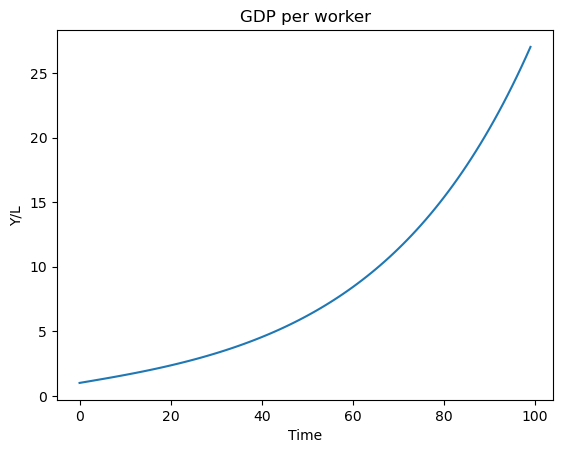

In [3]:
alpha = Romer.par.alpha
rho = Romer.par.rho
phi = Romer.par.phi
lambda_ = Romer.par.lambda_
s = Romer.par.s
delta = Romer.par.delta
n = Romer.par.n
s_R = Romer.par.s_R

T = 100 # Number of periods to simulate

# Initializing arrays to store the values of the endogenous variables
Y_R = np.zeros(T)
L_R = np.zeros(T)
K_R = np.zeros(T)
A_R = np.zeros(T)
LA_R = np.zeros(T)
Y_per_L = np.zeros(T)

# Setting the initial values of the endogenous variables
Y_R[0] = 1
L_R[0] = 1
K_R[0] = 1
A_R[0] = 1
LA_R[0] = s_R*L_R[0]
Y_per_L[0] = Y_R[0]/L_R[0]

# Simulating the model
for t in range(1, T):
    A_R[t] = A_R[t-1] + rho*A_R[t-1]**phi*LA_R[t-1]**lambda_ # Updating A
    K_R[t] = s*Y_R[t-1] + (1-delta)*K_R[t-1] # Updating K
    L_R[t] = (1+n)*L_R[t-1] # Updating L
    LA_R[t] = s_R*L_R[t] # Updating LA
    Y_R[t] = A_R[t]*K_R[t]**alpha*L_R[t]**(1-alpha) # Updating Y
    Y_per_L[t] = Y_R[t]/L_R[t] # Updating Y/L

plt.plot(Y_per_L)
plt.title('GDP per worker')
plt.xlabel('Time')
plt.ylabel('Y/L')
plt.show()


We thus have the path towards steady state for an economy with optimal parameter values. We see, that the economy expresses an exponential growth in GDP pr. capita. 


# Solow-model with land as fixed resource

$$
Y_t=K_t^\alpha(A_tL_t)^\beta X^\kappa, \alpha>0, \beta>0, \kappa>0, \alpha+\beta+\kappa=1
$$
$$
K_{t+1}=sY_t+(1-\delta)K_t, 0<s<1, 0<\delta<1
$$
$$
L_{t+1}=(1+n)L_t, n≥0
$$
$$
A_{t+1}=(1+g)A_t, g≥0
$$

The Solow model with land as input is constructed by adding land as input in the production function, such that we now have three inputs compared to the two inputs of the general Solow model.  

In [4]:
Y_per_L_sss, Y_sss, K_sss, A_sss = Solow.steady_state_values()
print(f"Steady state value of Y/L: {Y_per_L_sss}")
print(f"Steady state value of Y: {Y_sss}")
print(f"Steady state value of K: {K_sss}")
print(f"Steady state value of A: {A_sss}")

Steady state value of Y/L: 1.9999999999999998
Steady state value of Y: 1.9999999999999998
Steady state value of K: 4.0
Steady state value of A: 4.0


/Users/christopher/projects-2023-2x-chris-og-ras/modelproject/modelproject.py:69: RuntimeWarning: invalid value encountered in double_scalars
  eq1 = K**par.alpha*(A*par.L)**par.beta*par.X**par.kappa - par.s*K - par.delta*K


The steady state value of GDP pr. capita has positive relationships wrt. the savings rate, $s$, and the land pr. capita ratio, $X/L_t$. It has negative relationships wrt. the depreciation of capital, $\delta$, the population growth rate, $n$, and the growth rate of technology, $g$.

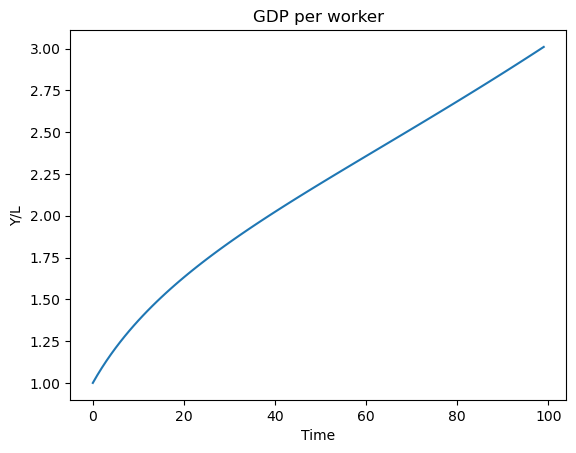

In [5]:
T = 100 # Number of periods to simulate

# Initializing arrays to store the values of the endogenous variables
Y_S = np.zeros(T)
K_S = np.zeros(T)
A_S = np.zeros(T)
Y_per_L_mland = np.zeros(T)

# Setting the initial values of the endogenous variables
Y_S[0] = 1
K_S[0] = 1
A_S[0] = 1
Y_per_L_mland[0] = Y_S[0]/Solow.par.L

# Simulating the model
for t in range(1, T):
    A_S[t] = (1+Solow.par.g)*A_S[t-1] # Updating A
    K_S[t] = Solow.par.s*Y_S[t-1] + (1-Solow.par.delta)*K_S[t-1] # Updating K
    Y_S[t] = K_S[t]**Solow.par.alpha*(A_S[t]*Solow.par.L)**Solow.par.beta*Solow.par.X**Solow.par.kappa # Updating Y
    Y_per_L_mland[t] = Y_S[t]/Solow.par.L # Updating Y/L

plt.plot(Y_per_L_mland)
plt.title('GDP per worker')
plt.xlabel('Time')
plt.ylabel('Y/L')
plt.show()

In this model where we have land as a fixed ressource we see that GDP per worker is growing over time with optimal parameters, just like in the general Solow model. However the growth path for the model with land is more linear. 

# Semi-endogenous R&D model with land as fixed resource

This model combines all the equations of the previous models. The reason why we look at this combined model, is because we get the combined dynamics of two relatic models, which in combination should give a more accurate representation of economies. This gives us the following equations:

$$
Y_t=K_t^\alpha(A_tL_t)^\beta X^\kappa, \alpha>0, \beta>0, \kappa>0, \alpha+\beta+\kappa=1
$$
$$
K_{t+1}=sY_t+(1-\delta)K_t, 0<s<1, 0<\delta<1
$$
$$
L_{t+1}=(1+n)L_t, n≥0
$$
$$
A_{t+1} - A_t= \rho A_t^\phi L_{A_t}^\lambda, 1>\phi, 1≥\lambda>0
$$
$$
L_t = L_{A_t} + L_{Y_t}
$$
$$
s_R L_t = L_{A_t}
$$

In [6]:
Y_per_L_ss, Y_ss, L_ss, K_ss, A_ss, LA_ss = SemiEndogenousRD.steady_state_values()

print(f"Steady state value of Y/L: {Y_per_L_ss}")
print(f"Steady state value of Y: {Y_ss}")
print(f"Steady state value of L: {L_ss}")
print(f"Steady state value of K: {K_ss}")
print(f"Steady state value of A: {A_ss}")
print(f"Steady state value of LA: {LA_ss}")

Steady state value of Y/L: 1.430118043991222
Steady state value of Y: 1.7876475549890276
Steady state value of L: 1.25
Steady state value of K: 6.127156317297445
Steady state value of A: 0.9629661979212158
Steady state value of LA: 0.25


The steady state relationships are also simular to the combined relationships of the previous two models.

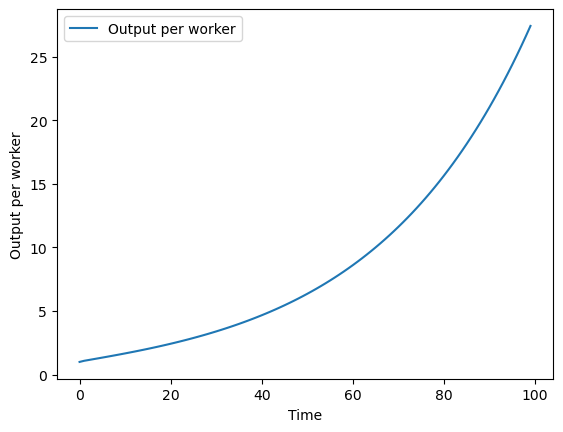

In [7]:
T = 100 # Number of periods to simulate

# Initializing arrays to store the values of the endogenous variables
Y = np.zeros(T)
L = np.zeros(T)
K = np.zeros(T)
A = np.zeros(T)
LA = np.zeros(T)
Y_per_L_se = np.zeros(T)

# Setting the initial values of the endogenous variables
Y[0] = 1
L[0] = 1
K[0] = 1
A[0] = 1
LA[0] = 1
Y_per_L_se[0] = Y[0]/L[0]

# Simulating the model
for t in range(1, T):
    A[t] = A[t-1] + SemiEndogenousRD.par.rho*A[t-1]**SemiEndogenousRD.par.phi*LA[t-1]**SemiEndogenousRD.par.lambda_ # Updating A
    K[t] = SemiEndogenousRD.par.s*Y[t-1] + (1-SemiEndogenousRD.par.delta)*K[t-1] # Updating K
    L[t] = (1+SemiEndogenousRD.par.n)*L[t-1] # Updating L
    LA[t] = SemiEndogenousRD.par.s_R*L[t]
    Y[t] = A[t]*(K[t]**SemiEndogenousRD.par.alpha)*(L[t]**(1-SemiEndogenousRD.par.alpha)) # Updating Y
    Y_per_L_se[t] = Y[t]/L[t] # Updating output per worker

#Plotting the results
fig, ax = plt.subplots()
ax.plot(range(T), Y_per_L_se, label='Output per worker')
ax.set_xlabel('Time')
ax.set_ylabel('Output per worker')
ax.legend()

We see that GDP pr. worker looks the same for the combined model as the semiendogenous Romer model with R&D.

# Interactive plot

We wil now in the below code combine the three above graphs and plot it with interactive widgets, so the graphs can be seen how they react to changes in the parameters.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

T = 100

def simulate1(T, alpha, rho, phi, lambda_, s, delta, n, s_R):
# Initializing arrays to store the values of the endogenous variables
    T = 100
    Y_R = np.zeros(T)
    L_R = np.zeros(T)
    K_R = np.zeros(T)
    A_R = np.zeros(T)
    LA_R = np.zeros(T)
    Y_per_L = np.zeros(T)

    # Setting the initial values of the endogenous variables
    Y_R[0] = 1
    L_R[0] = 1
    K_R[0] = 1
    A_R[0] = 1
    LA_R[0] = s_R*L_R[0]
    Y_per_L[0] = Y_R[0]/L_R[0]

    # Simulating the model
    for t in range(1, T):
        A_R[t] = A_R[t-1] + rho*A_R[t-1]**phi*LA_R[t-1]**lambda_ # Updating A
        K_R[t] = s*Y_R[t-1] + (1-delta)*K_R[t-1] # Updating K
        L_R[t] = (1+n)*L_R[t-1] # Updating L
        LA_R[t] = s_R*L_R[t] # Updating LA
        Y_R[t] = A_R[t]*K_R[t]**alpha*L_R[t]**(1-alpha) # Updating Y
        Y_per_L[t] = Y_R[t]/L_R[t] # Updating Y/L
    return Y_per_L

def simulate2(T, alpha, s, delta, beta, kappa, g, L_):
    
    T = 100
    X=1.0
    # Initializing arrays to store the values of the endogenous variables
    Y_S = np.zeros(T)
    K_S = np.zeros(T)
    A_S = np.zeros(T)
    Y_per_L_mland = np.zeros(T)

    # Setting the initial values of the endogenous variables
    Y_S[0] = 1
    K_S[0] = 1
    A_S[0] = 1
    Y_per_L_mland[0] = Y_S[0]/L_

    # Simulating the model
    for t in range(1, T):
        A_S[t] = (1+g)*A_S[t-1] # Updating A
        K_S[t] = s*Y_S[t-1] + (1-delta)*K_S[t-1] # Updating K
        Y_S[t] = K_S[t]**alpha*(A_S[t]*L_)**beta*X**kappa # Updating Y
        Y_per_L_mland[t] = Y_S[t]/L_ # Updating Y/L
    return Y_per_L_mland

def simulate3(T, alpha, rho, phi, lambda_, s, delta, n, s_R):
    T = 100
    # Initializing arrays to store the values of the endogenous variables
    Y = np.zeros(T)
    L = np.zeros(T)
    K = np.zeros(T)
    A = np.zeros(T)
    LA = np.zeros(T)
    Y_per_L_se = np.zeros(T)

    # Setting the initial values of the endogenous variables
    Y[0] = 1
    L[0] = 1
    K[0] = 1
    A[0] = 1
    LA[0] = 1
    Y_per_L_se[0] = Y[0]/L[0]

    # Simulating the model
    for t in range(1, T):
        A[t] = A[t-1] + rho*A[t-1]**phi*LA[t-1]**lambda_ # Updating A
        K[t] = s*Y[t-1] + (1-delta)*K[t-1] # Updating K
        L[t] = (1+n)*L[t-1] # Updating L
        LA[t] = s_R*L[t]
        Y[t] = A[t]*(K[t]**alpha)*(L[t]**(1-alpha)) # Updating Y
        Y_per_L_se[t] = Y[t]/L[t] # Updating output per worker
    return Y_per_L_se

def plot_simulation1(alpha, rho, phi, lambda_, s, delta, n,s_R, beta, kappa, g, L_):
    T = 100
    x = np.linspace(0, T, num=T)
    y = simulate1(T, alpha, rho, phi, lambda_, s, delta, n, s_R)
    z1 = simulate2(T, alpha, s, delta, beta, kappa, g, L_)
    z2 = simulate3(T, alpha, rho, phi, lambda_, s, delta, n, s_R)
    plt.plot(x, y, label='Semiendogenous romer model with R&D')
    plt.plot(x, z1, label='Solow-model with land as fixed resource')
    plt.plot(x, z2, label='Semi-endogenous R&D model with land as fixed resource')
    plt.legend() # Adds the legend to the plot
    plt.xlabel('Time')
    plt.ylabel('Y/L')
    plt.show()

def plot_simulation2(alpha, rho, phi, lambda_, s, delta, n, s_R, beta, kappa, g):
    T = 100
    x1 = np.linspace(0, T, num=T)
    y1 = simulate1(T, alpha, rho, phi, lambda_, s, delta, n, s_R)
    plt.plot(x1, y1, label='Semiendogenous romer model with R&D')
    plt.legend() # Adds the legend to the plot
    plt.xlabel('Time')
    plt.ylabel('Y/L')


def restricted_plot(alpha, rho, phi, lambda_, s, delta, n, s_R, beta, kappa, g, L_):
    if kappa + alpha + beta >= 1:
        print("Error: The restriction kappa + alpha + beta < 1 does not hold for Solow model with land as fixed resource & Semi-e. R&D with land as FR.")
        return plot_simulation2(alpha, rho, phi, lambda_, s, delta, n, s_R, beta, kappa, g)
    return plot_simulation1(alpha, rho, phi, lambda_, s, delta, n, s_R, beta, kappa, g, L_)


interact(restricted_plot, alpha=(0.0, 1, 0.1), rho=(0.0, 1, 0.05), phi=(0.0, 1, 0.1), lambda_=(0.0, 1, 0.1), s=(0.0, 1, 0.1), delta=(0.0, 1, 0.1), n=(0.0, 1, 0.01), s_R=(0.0, 1, 0.1), beta=(0.0,1,0.1),kappa=(0.0,1,0.1),g=(0.0, 1, 0.01), L_=(1,1,0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0), FloatSlider(value=0.5, description…

<function __main__.restricted_plot(alpha, rho, phi, lambda_, s, delta, n, s_R, beta, kappa, g, L_)>

We have implemented that when $$\alpha + \beta + \kappa ≥ 1$$ then it only shows one of the graphs, where this is not a constraint. It can be seen that the solow model with land as fixed resource is slower in the progress of getting higher compared to the other two. It can therefore be seen that by adding in the R&D, this helps the development in GDP pr. worker.